In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR']="/content/drive/MyDrive/kaggle"

**Importing Face Mask Dataset**

In [4]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 97% 159M/163M [00:01<00:00, 98.1MB/s]
100% 163M/163M [00:01<00:00, 87.2MB/s]


In [5]:
# Extracting the compressed DataSet
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [6]:
# what are the data present in the project (inside "drive" our kaggle folder is available and inside that the kaggle.json file is placed)
!ls

data  drive  face-mask-dataset.zip  sample_data


**Importing the dependencies**

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3004.jpg', 'with_mask_2712.jpg', 'with_mask_63.jpg', 'with_mask_2136.jpg', 'with_mask_1947.jpg']
['with_mask_2665.jpg', 'with_mask_796.jpg', 'with_mask_2834.jpg', 'with_mask_1111.jpg', 'with_mask_2273.jpg']


In [9]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1555.jpg', 'without_mask_2172.jpg', 'without_mask_1821.jpg', 'without_mask_735.jpg', 'without_mask_3312.jpg']
['without_mask_3524.jpg', 'without_mask_839.jpg', 'without_mask_1471.jpg', 'without_mask_2074.jpg', 'without_mask_318.jpg']


In [10]:
print("Number of with mask images:", len(with_mask_files))
print("Number of without mask images:", len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask -->1
without mask -->0

In [11]:
# create the labels

with_mask_labels=[1]*3725

without_mask_labels = [0]*3828

In [12]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [14]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the images**

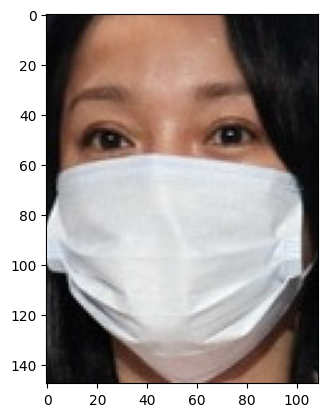

In [15]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1654.jpg')
imgplot = plt.imshow(img)
plt.show()

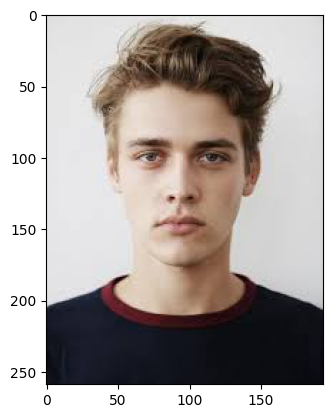

In [16]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_3526.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the images

2. Convert the images to numpy arrays

In [17]:
# convert images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)  

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
type(data)

list

In [19]:
len(data)

7553

In [20]:
data[0]

array([[[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       ...,

       [[213, 215, 214],
        [216, 218, 217],
        [217, 219, 218],
        ...,
        [182, 183, 188],
        [175, 176, 181],
        [177, 178, 183]],

       [[210, 212, 211],
        [213, 215, 214],
        [215, 217, 216],
        ...,
        [186, 187, 192],
        [182, 183, 188],
        [180, 182, 188]],

       [[211, 213, 212],
        [212, 214, 213],
        [213, 215, 214],
        ...,
        [185, 186, 191],
        [190, 191, 196],
        [186, 188, 193]]

In [21]:
type(data[0])

numpy.ndarray

In [22]:
data[0].shape

(128, 128, 3)

In [23]:
# converting image list and label list to numpy array

X = np.array(data)
Y = np.array(data)

In [24]:
type(X)

numpy.ndarray

In [25]:
type(Y)

numpy.ndarray

In [26]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553, 128, 128, 3)


In [27]:
print(Y)

[[[[251 251 251]
   [251 251 251]
   [251 251 251]
   ...
   [247 247 247]
   [247 247 247]
   [247 247 247]]

  [[251 251 251]
   [251 251 251]
   [251 251 251]
   ...
   [247 247 247]
   [247 247 247]
   [247 247 247]]

  [[251 251 251]
   [251 251 251]
   [251 251 251]
   ...
   [247 247 247]
   [247 247 247]
   [247 247 247]]

  ...

  [[213 215 214]
   [216 218 217]
   [217 219 218]
   ...
   [182 183 188]
   [175 176 181]
   [177 178 183]]

  [[210 212 211]
   [213 215 214]
   [215 217 216]
   ...
   [186 187 192]
   [182 183 188]
   [180 182 188]]

  [[211 213 212]
   [212 214 213]
   [213 215 214]
   ...
   [185 186 191]
   [190 191 196]
   [186 188 193]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255

**Train Test Split**

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [30]:
# Scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [31]:
X_train[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 255, 255],
        [253, 255, 255],
        [253, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 255, 255],
        [254, 255, 255],
        [254, 255, 255]],

       [[254, 252, 253],
        [255, 253, 254],
        [254, 252, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[170, 167, 187],
        [176, 173, 193],
        [171, 168, 187],
        ...,
        [255, 255, 255],
        [255, 255, 254],
        [255, 255, 253]],

       [[225, 222, 237],
        [228, 226, 241],
        [222, 220, 236],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 254]],

       [[247, 245, 254],
        [246, 244, 254],
        [245, 243, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [34]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.99215686, 1.        , 1.        ],
        [0.99215686, 1.        , 1.        ],
        [0.99215686, 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.99607843, 1.        , 1.        ],
        [0.99607843, 1.        , 1.        ],
        [0.99607843, 1.        , 1.        ]],

       [[0.99607843, 0.98823529, 0.99215686],
        [1.        , 0.99215686, 0.99607843],
        [0.99607843, 0.98823529, 0.99215686],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.66666667, 0.65490196, 0.73333333],
        [0.69019608, 0.67843137, 0.75686275],
        [0.67058824, 0

**Building a Convolutional Neural Networks(CNN)**
1)tensorflow
2)keras

In [35]:
import tensorflow as tf
from tensorflow import keras

In [38]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [43]:
# Compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
#Training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy=', accuracy)

In [ ]:
h = history

# Plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()



# Plot the accuracy value
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

In [ ]:
input_image_path = input('Path of the image to to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')  